<a href="https://colab.research.google.com/github/Namesakenberg/Deep_Learning/blob/main/feature_scaling_in_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [46]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [48]:
df = pd.get_dummies(df , columns=['Gender'] , dtype='int')

In [49]:
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [50]:
X = df.drop(columns = ['Purchased' , 'User ID'])
y= df['Purchased']


In [51]:
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [52]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [53]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [55]:
model = Sequential()
model.add(Dense(128 , activation='relu' , input_dim = X_train.shape[1]))
model.add(Dense(1 , activation = 'sigmoid' ))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
hist= model.fit(X_train ,y_train ,epochs=100 , validation_data=(X_test , y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5067 - loss: 551.1342 - val_accuracy: 0.6500 - val_loss: 209.6750
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5866 - loss: 163.7742 - val_accuracy: 0.6500 - val_loss: 39.2094
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5653 - loss: 40.0470 - val_accuracy: 0.6500 - val_loss: 14.2883
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6274 - loss: 21.3171 - val_accuracy: 0.3500 - val_loss: 54.2262
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5324 - loss: 25.5228 - val_accuracy: 0.6500 - val_loss: 3.2567
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4636 - loss: 67.3341 - val_accuracy: 0.3500 - val_loss: 5.9336
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4338 - loss: 28.2107 - val_accuracy: 0.3500 - val_loss: 64.0383
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5643 - loss: 30.7738 - va

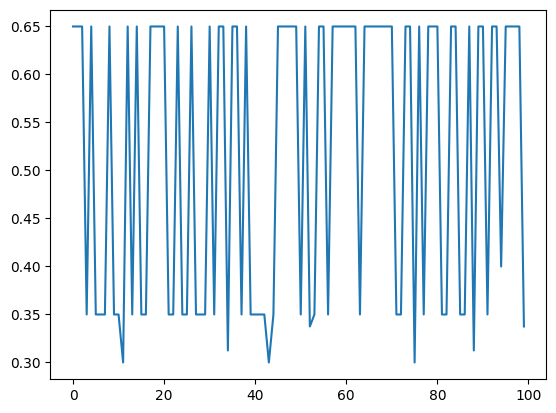

In [58]:
plt.plot(hist.history['val_accuracy'])

In [59]:
# the reason because of which the validation loss oscillates between 65 and 45 and never converges is
# the huge difference between the scale of the age and the salary column
# the age is between 18 and 60
# while the salary is between 15000 to 150000
# due to the scale of the 2 features being unequal the NN cannot identify the patterns properly

# Scaling or Normalizing the data

## use normalization when the minimum and the maximum value of the features are known and the data is bounded and not normally distributed


## use standardization when min and max value of the column are unkown  , and the data is approximately normally distributed

### normalization = X-min() / max() - min()

### standardization = X - mean / std dev


<Axes: xlabel='Age', ylabel='Density'>

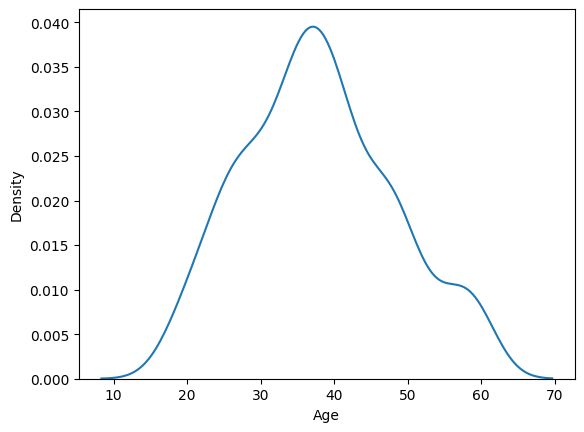

In [60]:
sns.kdeplot(X_train['Age'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

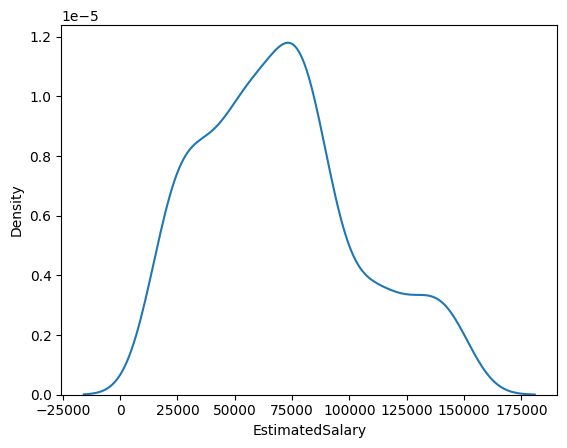

In [61]:
sns.kdeplot(df['EstimatedSalary'])

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor = "val_loss",
    min_delta= 0.00001,
    patience = 20,
    verbose = 0,
    mode ="auto",
    baseline = None,
    restore_best_weights=False,
)

In [68]:
model = Sequential()
model.add(Dense(128 , activation='relu' , input_dim = X_train.shape[1]))
model.add(Dense(1 , activation = 'sigmoid' ))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist= model.fit(X_train_scaled ,y_train ,epochs=100 , validation_data=(X_test_scaled , y_test),callbacks=callback)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5630 - loss: 0.6604 - val_accuracy: 0.7875 - val_loss: 0.6013
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8231 - loss: 0.5959 - val_accuracy: 0.8375 - val_loss: 0.5392
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8523 - loss: 0.5451 - val_accuracy: 0.8375 - val_loss: 0.4879
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8272 - loss: 0.5144 - val_accuracy: 0.8375 - val_loss: 0.4480
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8515 - loss: 0.4658 - val_accuracy: 0.8375 - val_loss: 0.4140
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8190 - loss: 0.4601 - val_accuracy: 0.8750 - val_loss: 0.3863
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8346 - loss: 0.4353 - val_accuracy: 0.8750 - val_loss: 0.3629
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8482 - loss: 0.3954 - val_accuracy: 0.8

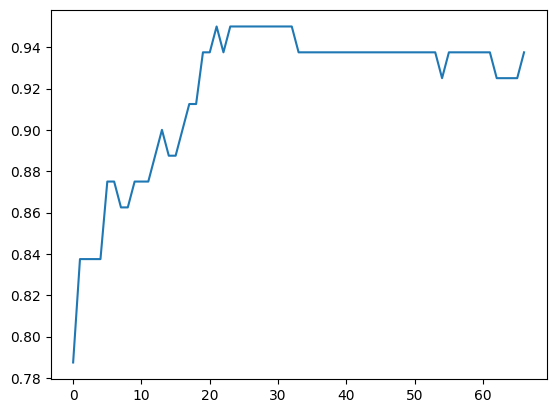

In [72]:
plt.plot(hist.history['val_accuracy'])